<H1>ICE 2: Unsupervised Learning<H1>
<H2>Cars dataset<H2>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [21]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')


Pre Processing the data:

In [22]:
df_clean = df[['Model Year', 'Electric Range', 'Base MSRP']]

Dropping rows with missing values in any of the columns. There are other options but this is the easiest.

In [30]:
df_clean = df_clean.fillna(df_clean.median())
df_sample = df_clean.sample(n=3000, random_state=42)

Scaling features:

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

<H3>Clustering:<H3>
<H4>KMeans<H3>
Using elbow method

In [32]:
K_range = range(2, 11)
sse = []  # Sum of squared errors

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


Plotting 

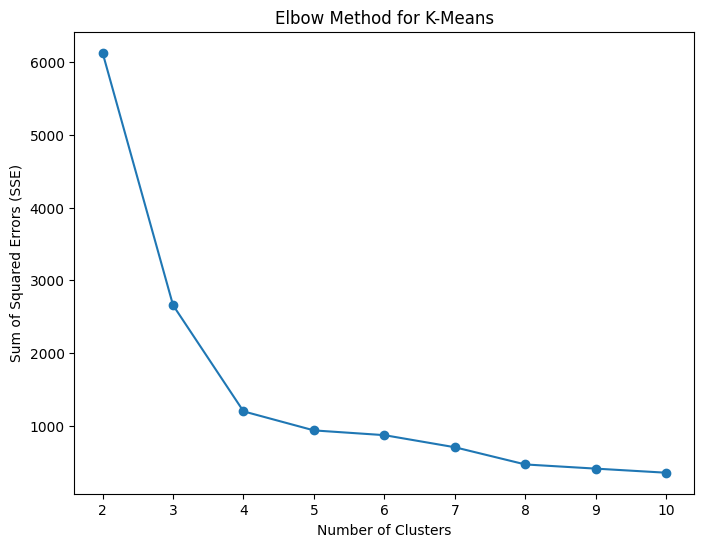

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

<H3>DBSCAN<H3>

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

Output

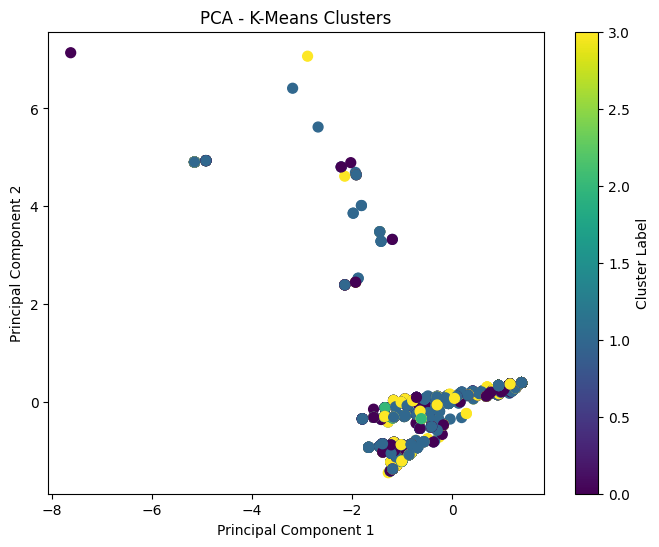

In [36]:
# Visualize clusters from K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('PCA - K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

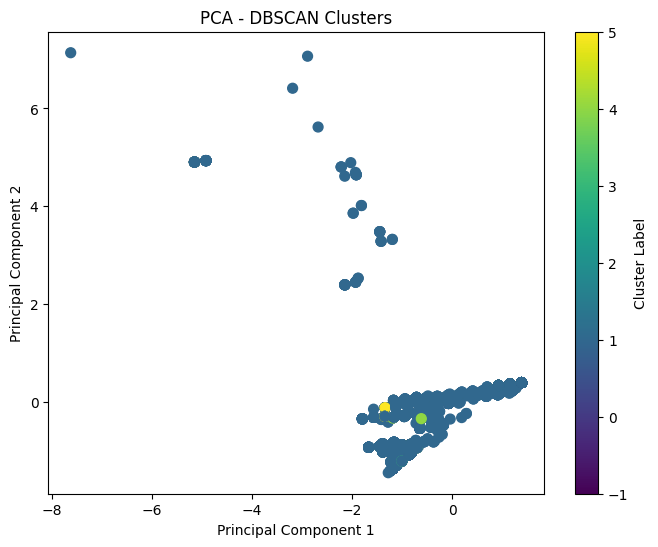

In [37]:
# Visualize clusters from DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('PCA - DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()